In [1]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
import warnings
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier

In [2]:
class PreProcessing():
    global stp
    stp  = set(stopwords.words("english"))
    stp.add('r')
    stp.add('u')
    stp.add('https')
    stp.add('com')
    def datacleaning(self,x):
        x = re.sub(r"(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n", " ",x)#removing links,brackets
        x = re.sub(r'\@w+|\#',' ',x)# removing Hastags
        x = re.sub(r'[^\w\s]',' ',x)#removing punctuations
        x = re.sub(r'\d+(\.\d+)?',' ',x)#remmoving numbers
        x = re.sub("[^a-zA-Z0-9]+", " ",x)#removing non english words
        x = re.sub(r'_',' ',x)
        x = re.sub(r'\s+',' ',x)#removing white spaces
        return x
    def datapreprocessing(self,x):
        cleaned_comm = self.datacleaning(x)
        cleaned_comm = cleaned_comm.lower()
        tokens = word_tokenize(cleaned_comm)
        filtcomm = [i for i in tokens if not i in stp]
        return " ".join(filtcomm)
    def lemmatizing(self,x):
        lem = nltk.WordNetLemmatizer()
        comment = [lem.lemmatize(i) for i in x]
        return x

In [3]:
class FeatureSelection():
    global tfidf_vectorizer
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=10000)
    def weighingTrigrams(self,x):
        tfidf = tfidf_vectorizer.fit_transform(x)
        return tfidf   
    def extractTrigrams(self):
        features = tfidf_vectorizer.get_feature_names()
        print(features)

In [4]:
class Models():
    global stratifiedkf
    stratifiedkf=StratifiedKFold(n_splits=10)
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def LogisticRegression(self):
        warnings.filterwarnings('ignore')
        logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
        score=cross_val_score(logreg,self.X,self.y,cv=stratifiedkf)
        print("============Logistic Regression==============")
        print("Cross Validation Scores are {}".format(score))
        print("Average Cross Validation score :{}".format(score.mean()))
        return score.mean()
    def NaiveBayes(self):
        warnings.filterwarnings('ignore')
        nb=GaussianNB()
        score=cross_val_score(nb,self.X.toarray(),self.y,cv=stratifiedkf)
        print("============Naive Bayes==============")
        print("Cross Validation Scores are {}".format(score))
        print("Average Cross Validation score :{}".format(score.mean()))
        return score.mean()
    def DecisionTree(self):
        warnings.filterwarnings('ignore')
        dt = DecisionTreeClassifier()
        score=cross_val_score(dt,self.X,self.y,cv=stratifiedkf)
        print("============Decision Tree==============")
        print("Cross Validation Scores are {}".format(score))
        print("Average Cross Validation score :{}".format(score.mean()))
        return score.mean()
    def SVM(self):
        warnings.filterwarnings('ignore')
        svm = SVC(kernel='linear')
        score=cross_val_score(svm,self.X,self.y,cv=stratifiedkf)
        print("============SVM==============")
        print("Cross Validation Scores are {}".format(score))
        print("Average Cross Validation score :{}".format(score.mean()))
        return score.mean()
    def RandomForest(self):
        warnings.filterwarnings('ignore')
        rf = RandomForestClassifier(n_estimators=10)
        score=cross_val_score(rf,self.X,self.y,cv=stratifiedkf)
        print("============Random Forest==============")
        print("Cross Validation Scores are {}".format(score))
        print("Average Cross Validation score :{}".format(score.mean()))
        return score.mean()

In [5]:
fbdf = pd.read_csv(r'C:\Users\SINGAPORE TRADERS\Desktop\IR Project\Offens Hate Detection\agr_en_fb_gold.csv')
fbdf.head()
temp2 = pd.read_csv(r'C:\Users\SINGAPORE TRADERS\Desktop\IR Project\Offens Hate Detection\agr_en_tw_gold.csv')

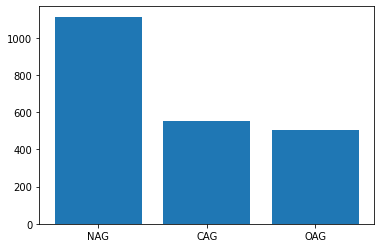

<AxesSubplot:ylabel='label'>

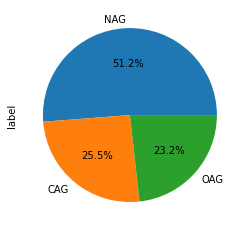

In [6]:
value = fbdf['label'].value_counts()
data = dict(value)
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

tags = fbdf['label'].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%')

In [7]:
hate = fbdf[fbdf['label']=='OAG']
offensive = fbdf[fbdf['label']=='CAG']
neither = fbdf[fbdf['label']=='NAG']
print(hate.shape)
print(offensive.shape)
print(neither.shape)
hate2 = temp2[temp2['label']=='OAG']
offensive2 = temp2[temp2['label']=='CAG']
neither2 = temp2[temp2['label']=='NAG']
print(hate2.shape)
print(offensive2.shape)
print(neither2.shape)
hate = pd.concat([hate,hate2], ignore_index = True)
offensive = pd.concat([offensive,offensive2], ignore_index = True)
print(hate.shape)
print(offensive.shape)
print(neither.shape)

(505, 3)
(555, 3)
(1113, 3)
(361, 3)
(413, 3)
(483, 3)
(866, 3)
(968, 3)
(1113, 3)


In [8]:
fbdf = pd.concat([hate,offensive,neither],ignore_index = True)

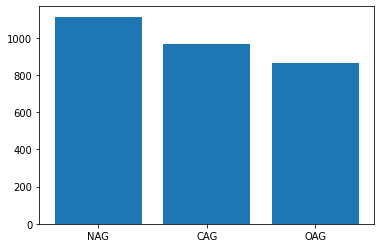

<AxesSubplot:ylabel='label'>

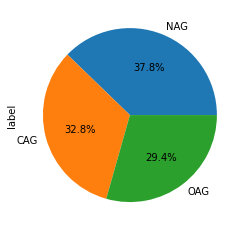

In [9]:
value = fbdf['label'].value_counts()
data = dict(value)
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

tags = fbdf['label'].value_counts()
tags.plot(kind='pie',autopct='%1.1f%%')

In [10]:
objpp = PreProcessing()
objfs = FeatureSelection()
fbdf.comments = fbdf['comments'].apply(objpp.datapreprocessing)
fbdf['comments'] = objpp.lemmatizing(fbdf['comments'])

In [11]:
fbdf.head()

,id,comments,label
0,facebook_corpus_msr_330416,bloody islamic nations nothing better spreadin...,OAG
1,facebook_corpus_msr_328475,hell going glorification mob justice violence ...,OAG
2,facebook_corpus_msr_468731,hope planned well still black money land gold,OAG
3,facebook_corpus_msr_384462,,OAG
4,facebook_corpus_msr_323130,resign post national convenor cm much guts mr ...,OAG


In [12]:
tfidf = objfs.weighingTrigrams(fbdf['comments'])
objfs.extractTrigrams()

['aa', 'aadhar', 'aadhar card', 'aaj', 'aap', 'aap cagpowercost', 'aaptards', 'aaye', 'ab', 'abdullah', 'abey', 'abhi', 'abhina', 'abhina prakash', 'abhina prakash status', 'able', 'abp', 'abp news', 'abroad', 'abroad must', 'absolute', 'absolutely', 'absolutely right', 'abt', 'abt jnu', 'abt jnu snakes', 'abused', 'abusing', 'abvp', 'academic', 'academic council', 'academic council meeting', 'academics', 'academics abroad', 'academics abroad must', 'accept', 'according', 'account', 'across', 'act', 'act like', 'acting', 'acting like', 'action', 'action anti', 'action jnu', 'action taken', 'actions', 'activism', 'activities', 'acts', 'actual', 'actually', 'ad', 'ad hilarious', 'add', 'additional', 'administration', 'administration faces', 'administration faces crisis', 'admission', 'adopt', 'advertisement', 'affected', 'afghanistan', 'afjal', 'african', 'afridi', 'afzal', 'afzal guru', 'afzal guru next', 'age', 'agenda', 'agents', 'aggression', 'agnst', 'ago', 'agree', 'agree twitter',

C:\Users\SINGAPORE TRADERS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
x = fbdf.comments
comm_len = []
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
for i in x:
    comm_len.append(len(i.split()))
print("Words Frequency : ", len(word_unique))
print("Unique Words  : ", len(unique))
print("Comments Average Length : ",np.mean(comm_len))
print("Comments Max Length : ",np.max(comm_len))
print("Comments Min Length : ",np.min(comm_len))

Words Frequency :  31514
Unique Words  :  7333
Comments Average Length :  10.693586698337292
Comments Max Length :  492
Comments Min Length :  0


In [14]:
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,india,571
1,jnu,417
2,twitter,236
3,anti,206
4,money,161
5,like,160
6,pakistan,148
7,people,147
8,indian,139
9,students,130


In [15]:
X = tfidf
y = fbdf['label']

In [16]:
objmd = Models(X,y)
lr=objmd.LogisticRegression()
dt=objmd.DecisionTree()
nb=objmd.NaiveBayes()
rf=objmd.RandomForest()
svm=objmd.SVM()

============Logistic Regression==============
Cross Validation Scores are [0.42711864 0.65084746 0.88474576 0.88474576 0.9220339  0.9220339
 0.86779661 0.91156463 0.93877551 0.87755102]
Average Cross Validation score :0.8287213190360889
============Decision Tree==============
Cross Validation Scores are [0.42033898 0.58983051 0.87118644 0.85423729 0.86779661 0.90169492
 0.90847458 0.85034014 0.92176871 0.87755102]
Average Cross Validation score :0.8063219185979478
============Naive Bayes==============
Cross Validation Scores are [0.43050847 0.64067797 0.8779661  0.8779661  0.86779661 0.92881356
 0.90169492 0.95238095 0.91496599 0.89455782]
Average Cross Validation score :0.8287328490718322
============Random Forest==============
Cross Validation Scores are [0.37288136 0.66440678 0.90508475 0.92542373 0.90169492 0.90508475
 0.91864407 0.91496599 0.92176871 0.92517007]
Average Cross Validation score :0.8355125100887812
============SVM==============
Cross Validation Scores are [0.43728814

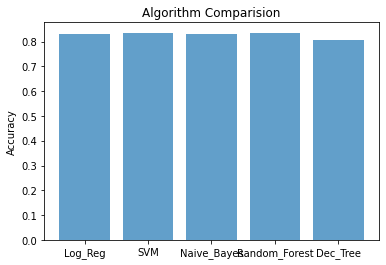

In [17]:
algos = ('Log_Reg','SVM','Naive_Bayes','Random_Forest','Dec_Tree')
y_pos = np.arange(len(algos))
performance = [lr,svm,nb,rf,dt]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, algos)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()

In [18]:
selection = VarianceThreshold(threshold=(0.000005))    
X = selection.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [19]:
rf = RandomForestClassifier(n_estimators=10)
dt = DecisionTreeClassifier()
svm = SVC(kernel='linear')
estimator_list = [
('svm',svm),
('dt',dt),('rf',rf)]

In [20]:
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator = LogisticRegression()
)

In [21]:
warnings.filterwarnings('ignore')
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(kernel='linear')),
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier(n_estimators=10))],
                   final_estimator=LogisticRegression())

In [22]:
y_test_pred = stack_model.predict(X_test)

In [23]:
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) #
report = classification_report( y_test, y_test_pred)
print(report)
print('-Test Accuracy : ' ,stack_model_test_accuracy*100,"%")

              precision    recall  f1-score   support

         CAG       0.77      0.76      0.77       194
         NAG       0.77      0.86      0.82       223
         OAG       0.88      0.76      0.82       173

    accuracy                           0.80       590
   macro avg       0.81      0.80      0.80       590
weighted avg       0.80      0.80      0.80       590

-Test Accuracy :  80.0 %


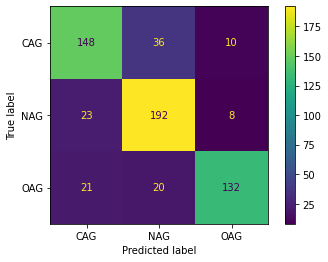

In [24]:
c_matrix = confusion_matrix(y_test,y_test_pred,labels = stack_model.classes_)
d = ConfusionMatrixDisplay(confusion_matrix = c_matrix,display_labels=stack_model.classes_)
d.plot()